# III. Data preprocessing exercise

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [147]:
import re

In [125]:
df = pd.read_csv('job-market.csv')

In [127]:
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
5,37404307.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
6,37404355.0,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0.0,30.0,NaN
7,37404350.0,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0.0,30.0,NaN
8,37404301.0,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0.0,30.0,NaN
9,37404286.0,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0.0,30.0,NaN


In [128]:
df.dtypes

Id                   float64
Title                 object
Company               object
Date                  object
Location              object
Area                  object
Classification        object
SubClassification     object
Requirement           object
FullDescription       object
LowestSalary         float64
HighestSalary        float64
JobType               object
dtype: object

In [129]:
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
1,37404337.0,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0.0,30.0,NaN
2,37404356.0,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0.0,30.0,NaN
3,37404330.0,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0.0,30.0,NaN
4,37404308.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
5,37404307.0,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0.0,30.0,NaN
6,37404355.0,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0.0,30.0,NaN
7,37404350.0,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0.0,30.0,NaN
8,37404301.0,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0.0,30.0,NaN
9,37404286.0,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0.0,30.0,NaN


## Clean data and change datatypes

In [130]:
# Date to datetime

df['Date'] = df['Date'].str.replace('T', ' ', regex=True)
df['Date'] = df['Date'].str.replace('.000Z', '', regex=True)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

In [131]:
len(df)

40789

In [132]:
df.isnull().sum()

Id                   30690
Title                30690
Company              31306
Date                 30690
Location             30690
Area                 34397
Classification       30690
SubClassification    30690
Requirement          30690
FullDescription      30946
LowestSalary         30690
HighestSalary        30690
JobType              30937
dtype: int64

In [133]:
df = df.dropna(axis=0)

In [134]:
len(df)

5898

In [135]:
df['Id'] = df['Id'].astype('int')

In [153]:
# html tag removed
df['FullDescription'] = df['FullDescription'].str.replace(r'<[^>]+>', "")

In [154]:
df['FullDescription']

121      If you have any difficulties or would like mor...
122                                                       
125      &nbsp; &nbsp;\n        \n        \n        \n ...
126                                                       
127       If you live in Brisbane, have MSP experience ...
                               ...                        
10091    \n        To submit your application in strict...
10094                                                     
10096                                                     
10097                                                     
10098    Please send your resume to Chloe by clicking t...
Name: FullDescription, Length: 5898, dtype: object

In [175]:
# html entities 
# import html

df['FullDescription'] = df['FullDescription'].apply(lambda )

# df['temp'] = html.unescape(df['FullDescription'])
for i in df['FullDescription']:
    print(html.unescape(i))
#     = df['FullDescription'].str.replace(r'/(?:^|;)([^&;]+)(?:&|$)/ig', "")


If you have any difficulties or would like more information please email gayle@exhr.com.au or phone 0468 336 224

   
        
        
        
        Call Siobhan on 02 8027 7909 or Email siobhan.f@anzuk.education
        

 If you live in Brisbane, have MSP experience and want to work for an employer where you will be recognised for your output forward your application to joades@humanisedgroup.com. Alternatively, you can call Jareth on 0412 540 973 for a confidential
          conversation.


Confidential enquiries can be made to Kelly Lambert, HR Business Partner on 08 7002 6500. Please submit your application to jobs@ms.asn.au
Confidential enquiries can be made to Kelly Lambert, HR Business Partner on 08 7002 6500. Please submit your application to jobs@ms.asn.au

If this role sounds of interest, then please click "APPLY NOW" and submit your CV for review

        This dynamic firm demonstrates a true team environment that is personalised and treats their staff with the individua



For any additional information please CALL 1300 562 562


        
        applications@walshsglass.com.au
         


         
        
        IMPORTANT: By submitting your email address and any other personal information when you APPLY to a job, you consent to such information being collected, held, used and disclosed in accordance with our COLLECTIONS NOTICE and PRIVACY POLICY.
        http://www.bluefinresources.com.au/privacy-policy

        
Please email your current resume to hr@lipa.com.au
If you would like to be considered and meet the above selection criteria please send through your resume to hr@murrayengineering.com.au

                  Legal Assistant - Insurance (4+ years') To submit your application, in strict confidence, please apply online using the appropriate link below. Alternatively, for a confidential discussion, please email Tina on tina.worgan@hudson.com
                   
You must have excellent communication skills both written and verbal. This is essent

03 8506 6522 or Ricky 03 8506 6521
A cafe/restaurant in Bondi Junction is seeking a casual Cook (up to 45 hours per week) to join our team.
A cafe in Melbourne is seeking a full time Cook (up to 45 hours per week) to join our team.

A cafe in Yarraville is seeking a full time Cook (up to 40 hours per week) to join our team.
A business in St Kilda is seeking a part time Cook (up to 30 hours per week) to join our team.
emjeaton@hotmail.comor call Emily on: 0438085379
A restaurant in Avalon Beach is seeking a casual Dish Hand (up to 20 hours per week) to join our team.
A restaurant in Avalon Beach is seeking a casual Waiter/Waitress (up to 25 hours per week) to join our team.
A bistro/pub/retail shop in Bayswater is seeking a casual Bartender (up to 35 hours per week) to join our team.
Please click the "" link and submit your resume & details online now.
A restaurant/bar in Elsternwick is seeking a part time Bartender (up to 35 hours per week) to join our team.
A cafe in Putney is seeking



To be considered for this opportunity, please contact James on (02) 9053 0007
 Only individuals with a strong work ethic and are reliable should apply. If you're interested in this role, please click 'apply now' or forward an up-to-date copy of your resume to damian.price@hays.com.au,
            after you have done this, you are more than welcome to call Damian for a confidential chat on (02) 9280 3544
To be considered for this opportunity, please contact James on (02) 9053 0007 or email your CV in strict confidence to james.clark@hedleyscott.com.au


         
        To apply for this exciting role, please forward your resume in our preferred Word or PDF format of 2MB or smaller to: resumes@sinclairrecruitment.com.au
        For any queries regarding this or other roles, please phone Sarah Campbell on 1300 JOBHUNT (562 486).
        
        
        

          
If
        you think a sales driven role is for you or you would like to know more, please call Shaun Hunter on 0282709

In [169]:
df['temp']

121      If you have any difficulties or would like mor...
122                                                       
125      &nbsp; &nbsp;\n        \n        \n        \n ...
126                                                       
127       If you live in Brisbane, have MSP experience ...
                               ...                        
10091    \n        To submit your application in strict...
10094                                                     
10096                                                     
10097                                                     
10098    Please send your resume to Chloe by clicking t...
Name: temp, Length: 5898, dtype: object

In [165]:
df['FullDescription']

121      If you have any difficulties or would like mor...
122                                                       
125      &nbsp; &nbsp;\n        \n        \n        \n ...
126                                                       
127       If you live in Brisbane, have MSP experience ...
                               ...                        
10091    \n        To submit your application in strict...
10094                                                     
10096                                                     
10097                                                     
10098    Please send your resume to Chloe by clicking t...
Name: FullDescription, Length: 5898, dtype: object

In [155]:
df.head(10)

,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
121,37404238,Fabricator/Installer,WORKPLACE ACCESS & SAFETY,2018-10-07,Melbourne,Bayside & South Eastern Suburbs,Trades & Services,Welders & Boilermakers,Trade qualified person with skills in welding ...,If you have any difficulties or would like mor...,0.0,30.0,Full Time
122,37404195,Boilermaker,RPM Contracting QLD P/l,2018-10-07,Brisbane,Southern Suburbs & Logan,Trades & Services,Welders & Boilermakers,Perm rate $30. Structural steel fab & weld out...,,0.0,30.0,Full Time
125,37404288,Casual Childcare Positions | Bondi Junction,anzuk Education,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Education & Training,Teaching - Early Childhood,"anzuk education are searching for reliable, en...",&nbsp; &nbsp;\n \n \n \n ...,0.0,30.0,Contract/Temp
126,37404267,Technician,Zoom Recruitment & Training,2018-10-07,Sydney,South West & M5 Corridor,Engineering,Mechanical Engineering,"This Australian Icon, connects the people of t...",,0.0,30.0,Full Time
127,37404230,Systems Engineer,Humanised Group,2018-10-07,Brisbane,CBD & Inner Suburbs,Information & Communication Technology,Networks & Systems Administration,Systems Engineer to work on BAU/Projects for a...,"If you live in Brisbane, have MSP experience ...",0.0,30.0,Full Time
129,37404237,SENIOR MARKETING & PRODUCT MANAGER,Credit Repair Australia Pty Ltd,2018-10-07,Sydney,South West & M5 Corridor,Marketing & Communications,Product Management & Development,Seeking a forward thinker who is looking for a...,,0.0,30.0,Full Time
130,37404370,Operations Delivery Manager,Woolworths Group,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Programme & Project Management,Ready for a challenge? Opportunity to be a par...,,0.0,30.0,Full Time
131,37404228,General Manager,Multiple Sclerosis SA and NT Inc,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",CEO & General Management,General/Business Unit Manager,3-year contract Based in Adelaide Key leadersh...,Confidential enquiries can be made to Kelly La...,0.0,30.0,Full Time
132,37404226,General Manager,Multiple Sclerosis SA and NT Inc,2018-10-07,Melbourne,CBD & Inner Suburbs,CEO & General Management,General/Business Unit Manager,3-year contract Based in Adelaide Key leader...,Confidential enquiries can be made to Kelly La...,0.0,30.0,Full Time
133,37404174,Technical Support Executive - $70K + Super - C...,Command Group,2018-10-07,Sydney,"CBD, Inner West & Eastern Suburbs",Information & Communication Technology,Help Desk & IT Support,Do you have strong technical support skills? L...,,0.0,30.0,Full Time


In [143]:
df.dtypes

Id                            int64
Title                        object
Company                      object
Date                 datetime64[ns]
Location                     object
Area                         object
Classification               object
SubClassification            object
Requirement                  object
FullDescription              object
LowestSalary                float64
HighestSalary               float64
JobType                      object
dtype: object

# V. Dimensionality Reduction

In [64]:
from sklearn.decomposition import PCA as sklearnPCA
from sklearn import datasets

In [77]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [78]:
data = pd.read_csv(url, header=None)
y = data[4]
X = data.iloc[:, 0:4]

In [91]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: 4, Length: 150, dtype: object

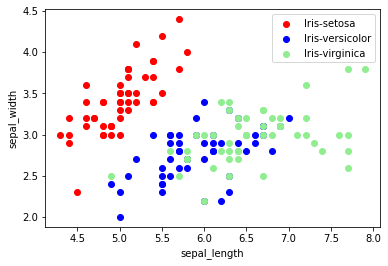

In [79]:
plt.scatter(X[y=='Iris-setosa'].iloc[:,0], X[y=='Iris-setosa'].iloc[:,1], label='Iris-setosa', c='red')
plt.scatter(X[y=='Iris-versicolor'].iloc[:,0], X[y=='Iris-versicolor'].iloc[:,1], label='Iris-versicolor', c='blue')
plt.scatter(X[y=='Iris-virginica'].iloc[:,0], X[y=='Iris-virginica'].iloc[:,1], label='Iris-virginica', c='lightgreen')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')

plt.show()


In [74]:
X_norm = (X - X.min())/(X.max() - X.min())

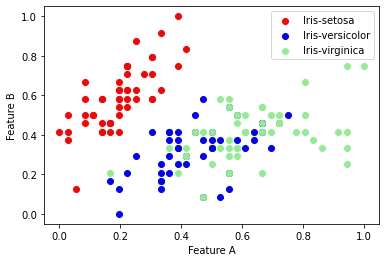

In [80]:
plt.scatter(X_norm[y=='Iris-setosa'].iloc[:,0], X_norm[y=='Iris-setosa'].iloc[:,1], label='Iris-setosa', c='red')
plt.scatter(X_norm[y=='Iris-versicolor'].iloc[:,0], X_norm[y=='Iris-versicolor'].iloc[:,1], label='Iris-versicolor', c='blue')
plt.scatter(X_norm[y=='Iris-virginica'].iloc[:,0], X_norm[y=='Iris-virginica'].iloc[:,1], label='Iris-virginica', c='lightgreen')

plt.legend()
plt.xlabel('Feature A')
plt.ylabel('Feature B')

plt.show()


In [81]:
pca = sklearnPCA(n_components=2)
transformed = pd.DataFrame(pca.fit_transform(X_norm))

In [94]:
transformed

,0,1
0,-0.630361,0.111556
1,-0.623546,-0.100313
2,-0.669793,-0.047220
3,-0.654633,-0.098791
4,-0.648263,0.137558
...,...,...
145,0.551755,0.058990
146,0.406278,-0.172227
147,0.447293,0.036996
148,0.489218,0.149121


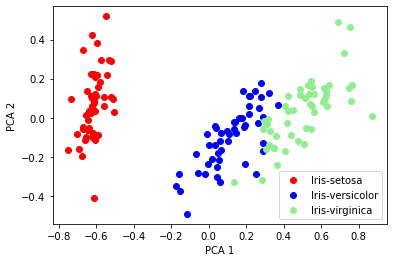

In [96]:
plt.scatter(transformed[y=='Iris-setosa'].iloc[:,0], transformed[y=='Iris-setosa'].iloc[:,1], label='Iris-setosa', c='red')
plt.scatter(transformed[y=='Iris-versicolor'].iloc[:,0], transformed[y=='Iris-versicolor'].iloc[:,1], label='Iris-versicolor', c='blue')
plt.scatter(transformed[y=='Iris-virginica'].iloc[:,0], transformed[y=='Iris-virginica'].iloc[:,1], label='Iris-virginica', c='lightgreen')

plt.legend()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.show()
